In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import os
os.chdir("C:/Users/Komal S Boraste/Downloads")
df=pd.read_csv('HR_comma_sep.csv')

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Q1. Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e whether they leave the company or continue to work).
### Q2. Plot a bar charts showing impact of employee salaries on retention.
### Q3. Plot bar charts showing corelation between department and employee retention
### Q4. Now build logistic regression model using variables thet were narrowed down in step 1.
### Q5. Measure the accuracy of the model.

### Data exploration and visualization

In [9]:
df.shape

(14999, 10)

In [10]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
import seaborn as sns

<AxesSubplot:>

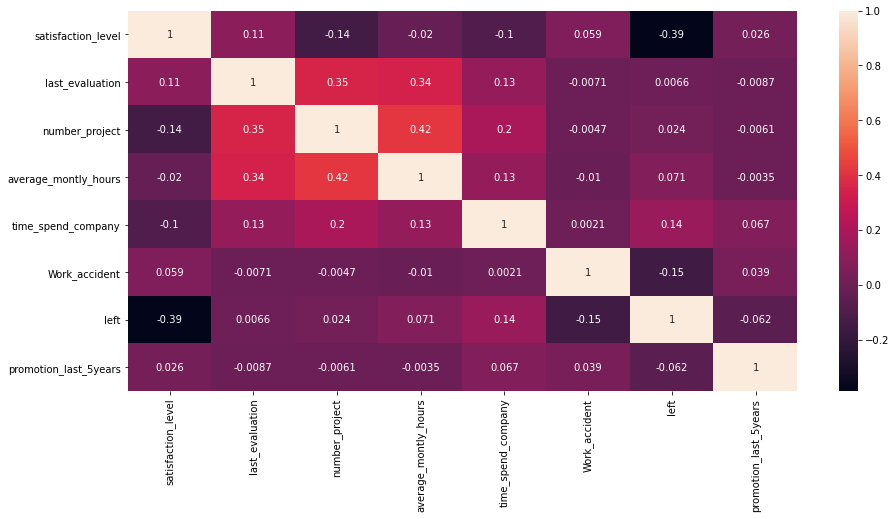

In [8]:
corr1=df.corr()
plt.subplots(figsize=(15,7))
sns.heatmap(corr1,annot=True)

In [11]:
df_left=df[df.left==1]
df_left.shape

(3571, 10)

In [12]:
df_retained=df[df.left==0]
df_retained.shape

(11428, 10)

#### Average number of all columns

In [14]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we get following conclusions,   

1. Satisfaction Level:-   
Satisfaction level is low (0.44) when employees are leaving vs the retained ones (0.66).   
2. Average Monthly Hours:-   
Average monthly hours are higher when employees are leaving (199 vs 207).   
3. Promotion Last 5 Years:-   
Employees who get promotion are retained more.

### Impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

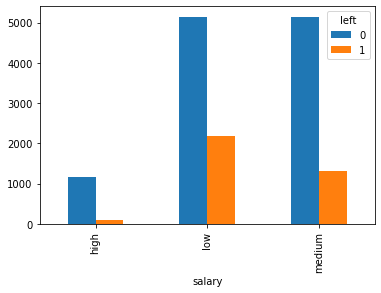

In [15]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are not leaving the company.

### Department wise employee retention rate

<AxesSubplot:xlabel='Department'>

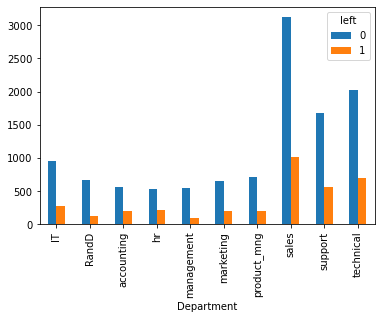

In [16]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From above chart there is impact of department on employee retention but it is not major.

#### We will use following variables as independent variables in our model.
1. Satisfaction level
2. Average Monthly Hours
3. Promotion Last 5 Years
4. Salary

In [20]:
Sub_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
Sub_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [21]:
#Salary is categorical variable so it needs to be converted to numbers so we will use dummy variable for that.
salary_dummies=pd.get_dummies(Sub_df.salary)

In [23]:
df_with_dummies=pd.concat([Sub_df,salary_dummies],axis=1)

In [24]:
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


We need to remove salary column which is text data.

In [25]:
df_with_dummies.drop('salary',axis=1,inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


### Performing Logistic regression

In [40]:
X=df_with_dummies

In [41]:
y=df.left

In [48]:
#split data into train and test format
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model=LogisticRegression()

In [51]:
model.fit(X_train,y_train)

LogisticRegression()

In [52]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Accuracy of the model

In [53]:
model.score(X_test,y_test)

0.7716190476190476